Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import joblib

1. Loading dataset

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

2. Splitting

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

3. Scaling

In [4]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

4. Baseline model

In [5]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_s, y_train)
y_pred = knn.predict(X_test_s)
print("Baseline accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Baseline accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



5. Grid search for best k and hyperparams

In [6]:
param_grid = {
    'n_neighbors': list(range(1,31)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_s, y_train)
print("Best params:", grid.best_params_)
best_knn = grid.best_estimator_

Best params: {'n_neighbors': 17, 'p': 2, 'weights': 'distance'}


6. Evaluate best model on test

In [7]:
y_pred_best = best_knn.predict(X_test_s)
print("Test acc (best):", accuracy_score(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Test acc (best): 0.9666666666666667
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



7. Save articrafts

In [8]:
joblib.dump({'model': best_knn, 'scaler': scaler}, 'knn_pipeline.joblib')

['knn_pipeline.joblib']

8. Decision boundary visualization

In [9]:
pca = PCA(n_components=2)
X_all_s = scaler.fit_transform(X)
X2 = pca.fit_transform(X_all_s)

In [11]:
X2_train, X2_test = train_test_split(X2, test_size=0.2, stratify=y, random_state=42)
vis_knn = KNeighborsClassifier(**grid.best_params_).fit(X2_train, y_train)

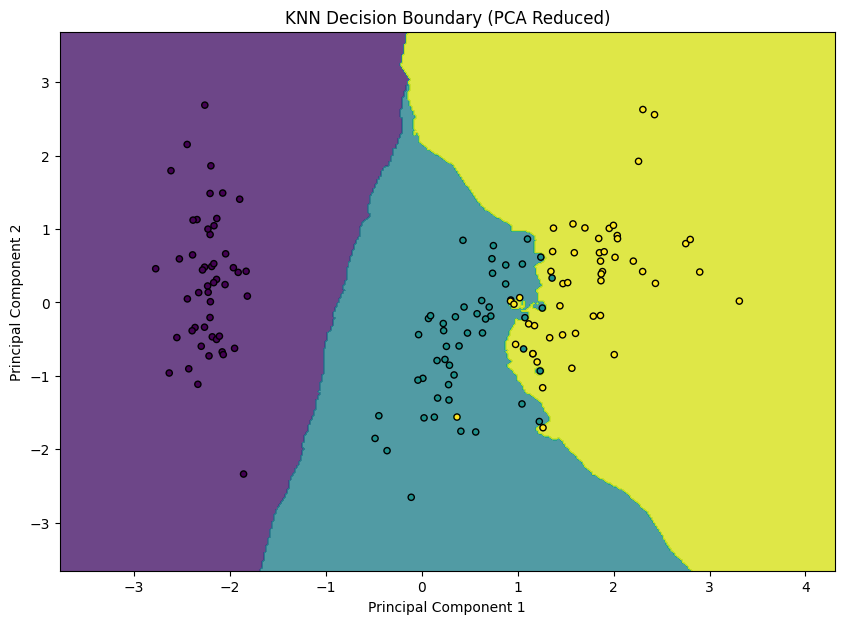

In [13]:
Z = vis_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.8)

plt.scatter(X2[:, 0], X2[:, 1], c=y, edgecolor='k', s=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KNN Decision Boundary (PCA Reduced)')
plt.show()